## Problem

$$f(w_1, w_2) = 0.1w_1^2 + 2w_2^2 \;\;\;\;\;\;\;(1)$$

In [13]:
import numpy as np

### Momentum

In [14]:
def df_w(w):
    """
    Thực hiện tính gradient của dw1 và dw2
    Arguments:
    W -- np.array [w1, w2]
    Returns:
    dW -- np.array [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2
    """
    #################### YOUR CODE HERE ####################


    dW = np.array([0.2*w[0] , 4*w[1]])
    ########################################################

    return dW

In [15]:
def sgd_momentum(W, dW, lr, V, beta):
    """
    Thực hiện thuật tóan Gradient Descent + Momentum để update w1 và w2
    Arguments:
    W -- np.array: [w1, w2]
    dW -- np.array: [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2
    lr -- float: learning rate
    V -- np.array: [v1, v2] Exponentially weighted averages gradients
    beta -- float: hệ số long-range average
    Returns:
    W -- np.array: [w1, w2] w1 và w2 sau khi đã update
    V -- np.array: [v1, v2] Exponentially weighted averages gradients sau khi đã cập nhật
    """
    #################### YOUR CODE HERE ####################

    V = beta*V - (1-beta)*dW
    W = W - lr*V
    ########################################################
    return W, V

In [22]:
def train_p1(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm minimum của function (1) dựa vào thuật toán
    được truyền vào từ optimizer
    Arguments:
    optimize : function thực hiện thuật toán optimization cụ thể
    lr -- float: learning rate
    epochs -- int: số lượng lần (epoch) lặp để tìm điểm minimum
    Returns:
    results -- list: list các cặp điểm [w1, w2] sau mỗi epoch (mỗi lần cập nhật)
    """
    # initial
    W = np.array([-5, -2], dtype=np.float32)
    V = np.array([0, 0], dtype=np.float32)
    results = [W]
    #################### YOUR CODE HERE ####################
    # Tạo vòng lặp theo số lần epochs
    # tìm gradient dW gồm dw1 và dw2
    # dùng thuật toán optimization cập nhật w1, w2, v1, v2
    # append cặp [w1, w2] vào list results
    for i in range(epochs):
        dW = df_w(W)
        W, V = optimizer(W , dW , lr , V , 0.9)

        results.append(W)
    ########################################################
    return results

In [23]:
results  =  train_p1(sgd_momentum, lr=0.6, epochs=30)
results

[array([-5., -2.], dtype=float32),
 array([-5.06, -2.48]),
 array([-5.17472, -3.5072 ]),
 array([-5.34006464, -5.273408  ]),
 array([-5.55295559, -8.12861312]),
 array([ -5.81119292, -12.64916488]),
 array([ -6.11334082, -19.75346103]),
 array([ -6.45863403, -30.88815821]),
 array([ -6.84690152, -48.32254365]),
 array([ -7.27850508, -75.61090101]),
 array([  -7.75429035, -118.31703889]),
 array([  -8.27554857, -185.14865231]),
 array([  -8.84398756, -289.73278094]),
 array([  -9.4617105 , -453.39436414]),
 array([ -10.13120167, -709.5044364 ]),
 array([  -10.85531814, -1110.28456618]),
 array([  -11.63728678, -1737.45497887]),
 array([  -12.480706  , -2718.89754521]),
 array([  -13.38955177, -4254.73126577]),
 array([  -14.36818758, -6658.11711806]),
 array([   -15.42137807, -10419.11249345]),
 array([   -16.55430604, -16304.59532973]),
 array([-1.77725929e+01, -2.55146328e+04]),
 array([-1.90823222e+01, -3.99271783e+04]),
 array([-2.04900664e+01, -6.24809921e+04]),
 array([-2.20029170

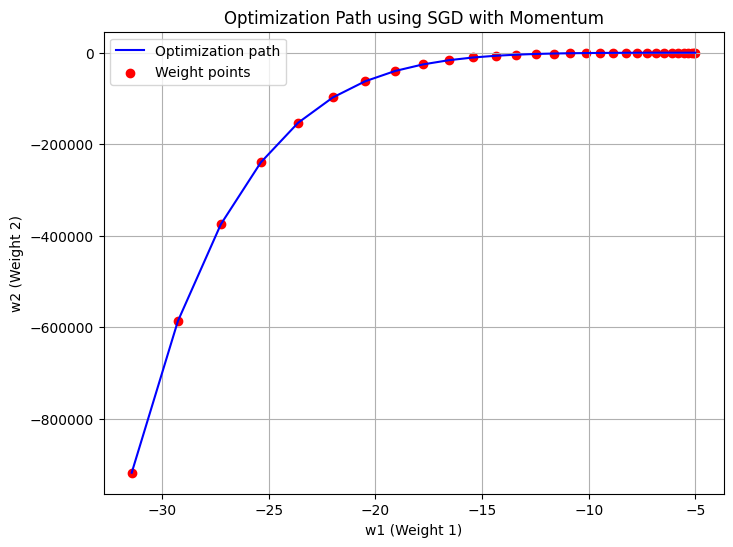

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot_optimization_path(results):
    """
    Plot the optimization path showing how the weights change during training.
    
    Arguments:
    results -- list: A list of weight pairs [w1, w2] from the optimizer
    """
    # Extract w1 and w2 values
    w1_values = [res[0] for res in results]
    w2_values = [res[1] for res in results]

    # Plot the path of optimization with lines and scatter points for the circles
    plt.figure(figsize=(8, 6))
    
    # Plot the line connecting the points
    plt.plot(w1_values, w2_values, linestyle='-', color='b', label="Optimization path")
    
    # Plot circles at each point 
    plt.scatter(w1_values, w2_values, color='r', marker='o', label="Weight points")
    
    # Add labels and title
    plt.xlabel('w1 (Weight 1)')
    plt.ylabel('w2 (Weight 2)')
    plt.title('Optimization Path using SGD with Momentum')
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.show()

# Plot the optimization path
plot_optimization_path(results)